In [1]:
library(dplyr)
library(tidyr)
library(ISLR)
library(MASS)
library(ggplot2)
library(e1071)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



In [2]:
df <- read.csv('cleaned_loan_data.csv')
head(df$loan_rate, 20)

[1] 2 2 2 1 2 2 2 2 2 1 2 1 2 2 1 0 0 1 2 1

In [3]:
df2 <- df %>% filter(loan_rate != 2) %>% dplyr::select(-c(policy_code, id, X, member_id, term, out_prncp_inv)) %>% select_if(is.numeric) 
df2$loan_rate <- as.factor(df2$loan_rate)
head(df2$loan_rate)

[1] 1 1 1 1 0 0
Levels: 0 1

In [4]:
useful_var = c("loan_amnt", "funded_amnt", "funded_amnt_inv", 
               "int_rate", "installment", "dti", "delinq_2yrs", "inq_last_6mths", 
               "open_acc", "pub_rec", "revol_bal", "revol_util", "total_acc", 
               "total_rec_int", "total_rec_late_fee", "collections_12_mths_ex_med", 
               "acc_now_delinq", "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim", "loan_rate")

In [5]:
df3 <- df2[, useful_var]
colnames(df2)

[1] "loan_amnt"                  "funded_amnt"               
 [3] "funded_amnt_inv"            "int_rate"                  
 [5] "installment"                "annual_inc"                
 [7] "dti"                        "delinq_2yrs"               
 [9] "inq_last_6mths"             "open_acc"                  
[11] "pub_rec"                    "revol_bal"                 
[13] "revol_util"                 "total_acc"                 
[15] "out_prncp"                  "total_pymnt"               
[17] "total_pymnt_inv"            "total_rec_prncp"           
[19] "total_rec_int"              "total_rec_late_fee"        
[21] "recoveries"                 "collection_recovery_fee"   
[23] "last_pymnt_amnt"            "collections_12_mths_ex_med"
[25] "acc_now_delinq"             "tot_coll_amt"              
[27] "tot_cur_bal"                "total_rev_hi_lim"          
[29] "loan_rate"

In [6]:
set.seed(1)
train=sample(nrow(df3), round(0.75 * nrow(df3)))
trainset=df3[train,]
testset=df3[-train,]

In [7]:
glm.fit2 = glm(loan_rate~., data = trainset, family = binomial)
summary(glm.fit2)


Call:
glm(formula = loan_rate ~ ., family = binomial, data = trainset)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.0322  -0.9056   0.5950   0.7818   4.7886  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 3.367e+00  3.678e-02  91.537  < 2e-16 ***
loan_amnt                  -3.203e-04  3.972e-04  -0.806  0.42004    
funded_amnt                 1.454e-03  4.605e-04   3.157  0.00159 ** 
funded_amnt_inv            -1.215e-03  2.312e-04  -5.256 1.47e-07 ***
int_rate                   -1.078e-01  1.663e-03 -64.820  < 2e-16 ***
installment                 1.778e-03  8.138e-05  21.850  < 2e-16 ***
dti                        -3.396e-02  8.251e-04 -41.159  < 2e-16 ***
delinq_2yrs                -1.020e-01  7.090e-03 -14.380  < 2e-16 ***
inq_last_6mths             -2.677e-02  5.954e-03  -4.496 6.92e-06 ***
open_acc                   -3.197e-02  1.756e-03 -18.207  < 2e-16 ***
pub_rec                    -5

In [8]:
glm.probs=predict(glm.fit2, testset, type="response")
glm.pred=rep(0, nrow(testset)) 
glm.pred[glm.probs>0.5]=1
table(glm.pred, testset$loan_rate) 
1-mean(glm.pred==testset$loan_rate)

        
glm.pred     0     1
       0  2494  1510
       1 11557 37017

[1] 0.248526

In [8]:
colnames(testset)

[1] "loan_amnt"                  "funded_amnt"               
 [3] "funded_amnt_inv"            "int_rate"                  
 [5] "installment"                "dti"                       
 [7] "delinq_2yrs"                "inq_last_6mths"            
 [9] "open_acc"                   "pub_rec"                   
[11] "revol_bal"                  "revol_util"                
[13] "total_acc"                  "total_rec_int"             
[15] "total_rec_late_fee"         "collections_12_mths_ex_med"
[17] "acc_now_delinq"             "tot_coll_amt"              
[19] "tot_cur_bal"                "total_rev_hi_lim"          
[21] "loan_rate"

In [9]:
testset$loan_rate <- as.numeric(as.character(testset$loan_rate))

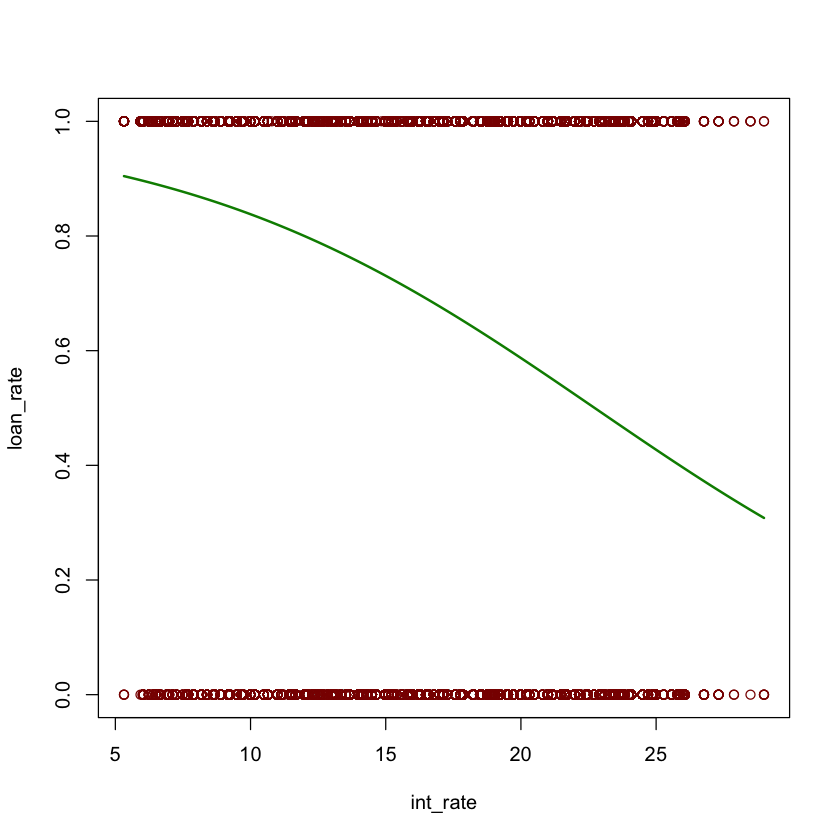

In [16]:
fit = glm(loan_rate ~ int_rate, data=trainset, family=binomial)
newdat <- data.frame(int_rate=seq(min(testset$int_rate), max(testset$int_rate),len=100))
newdat$loan_rate = predict(fit, newdata=newdat, type="response")
plot(loan_rate~int_rate, data=testset, col="red4")
lines(loan_rate~int_rate, newdat, col="green4", lwd=2)

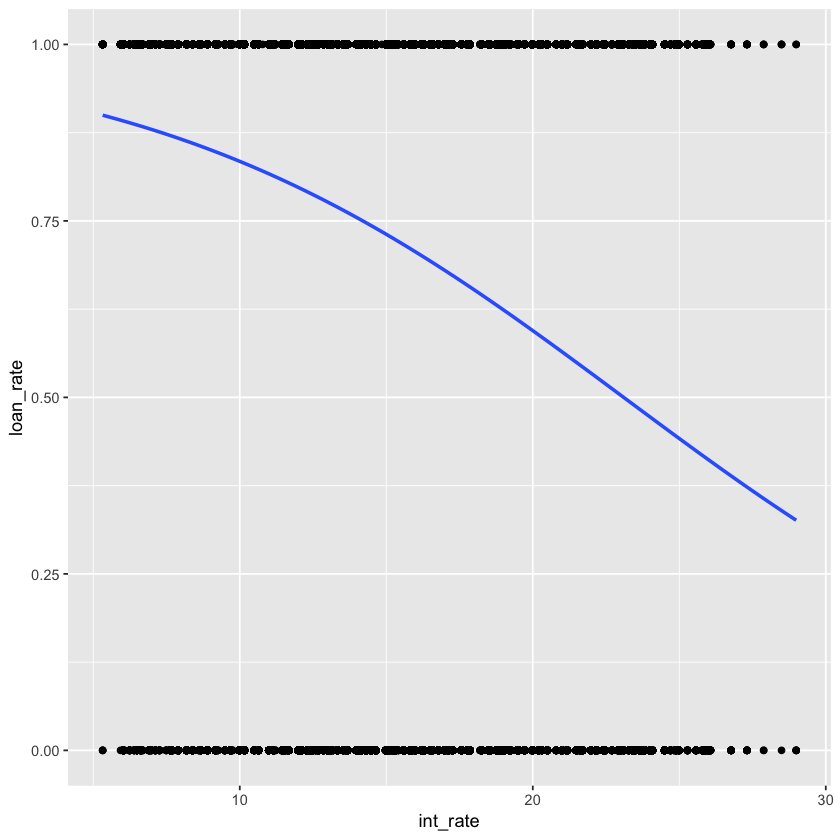

In [42]:
ggplot(testset, aes(x=int_rate, y=loan_rate)) + geom_point() +
    geom_smooth(method = "glm", method.args = list(family = "binomial"), se = FALSE)

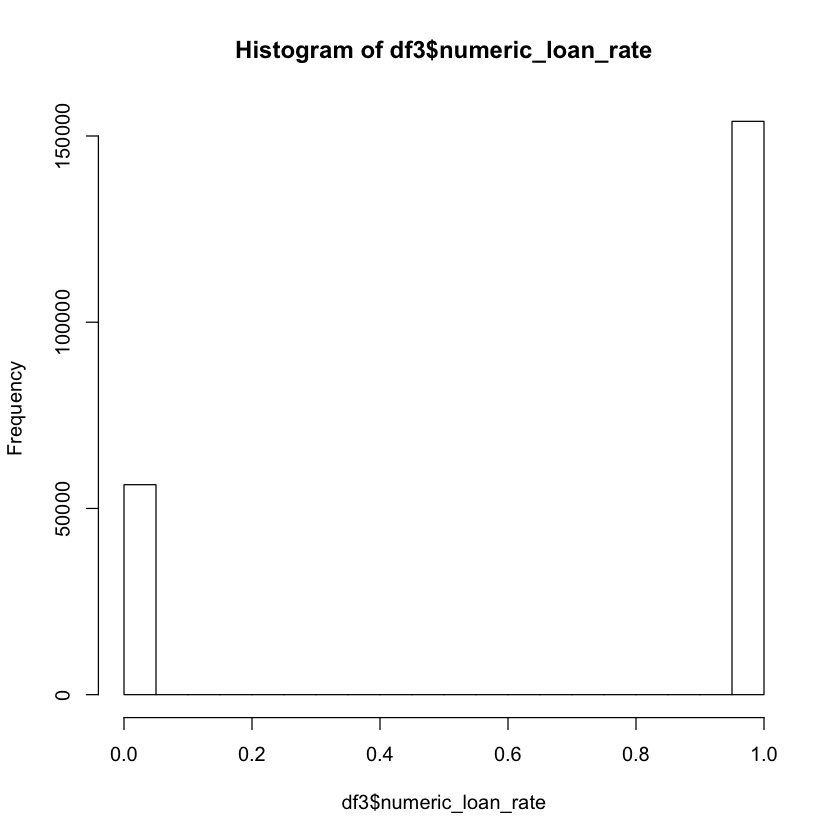

In [68]:
hist(df3$numeric_loan_rate)

In [17]:
temp <- sample(nrow(df3), 30000)
df4 <- df3[temp, ]

In [18]:
train = sample(nrow(df4), round(0.8*nrow(df4)))
length(train)

[1] 24000

In [19]:
#set.seed(1) 
#tune.out=tune(svm, loan_rate~., data=df4[train,], kernel = "sigmoid", 
              #ranges=list(cost=c(0.1, 1, 10, 100, 1000))) 
#summary(tune.out)

In [30]:
svmfit=svm(loan_rate~., data=df4[train,], kernel = "radial", cost = 0.1) 
y_pred2 = predict(svmfit, newdata=df4[-train,])

In [31]:
true=df4[-train, "loan_rate"]
table(true, y_pred2)
1-(sum(true == y_pred2)/nrow(df4[-train,]))

    y_pred2
true    0    1
   0   91 1504
   1   44 4361

[1] 0.258

In [32]:
temp <- df4[-train,]
head(temp)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,⋯,revol_util,total_acc,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_rate
63706,8400,8400,8400,6.03,255.66,15.29,0,3,12,0,⋯,14.9,35,779.51,0,0,0,0,139562,41748,1
77293,8000,8000,8000,21.00,301.41,14.88,0,2,13,0,⋯,92.3,26,2707.79,0,0,0,0,77169,13800,0
2773,10000,10000,10000,16.24,352.76,14.22,2,5,8,0,⋯,36.1,16,2160.88,0,0,0,625,29420,10000,1
38063,14825,14825,14825,6.03,451.21,20.53,0,1,15,0,⋯,4.3,49,914.28,0,0,0,0,37474,68400,1
57878,28000,28000,28000,22.47,780.84,16.97,0,1,13,0,⋯,48.9,36,2566.20,0,0,0,0,180845,31000,0
138046,10000,10000,10000,9.17,318.79,22.46,2,0,8,0,⋯,38.2,36,1083.65,0,0,0,0,29828,16800,0


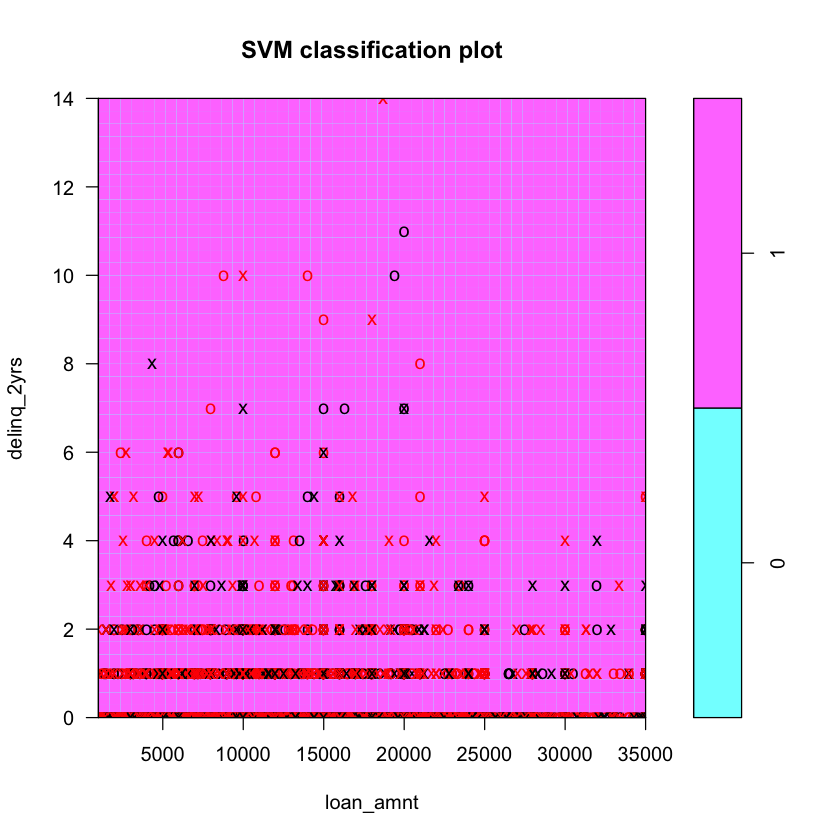

In [44]:
plot(svmfit, temp, delinq_2yrs~loan_amnt) 

In [45]:
true2=df2[-train, "loan_rate"]
pred2=predict(svmfit, newdata=df2[-train,])
table(true2, pred2)

     pred2
true2      0      1
    0   3815  46669
    1    932 134896

In [46]:
1-(sum(true2 == pred2)/nrow(df2[-train,]))

[1] 0.2554908

In [52]:
svmfit3 = svm(loan_rate~., data=df4[train,], kernel = "sigmoid", cost = 0.1) 
y_pred3 = predict(svmfit3, newdata=df4[-train,])
true3=df2[-train, "loan_rate"]
pred3=predict(svmfit3, newdata=df2[-train,])
table(true3, pred3)
1-(sum(true3 == pred3)/nrow(df2[-train,]))

     pred3
true3      0      1
    0  15881  34603
    1  25384 110444

[1] 0.3219707

In [54]:
1-((15881 + 110444)/(15881+34603+25384+110444))

[1] 0.3219707

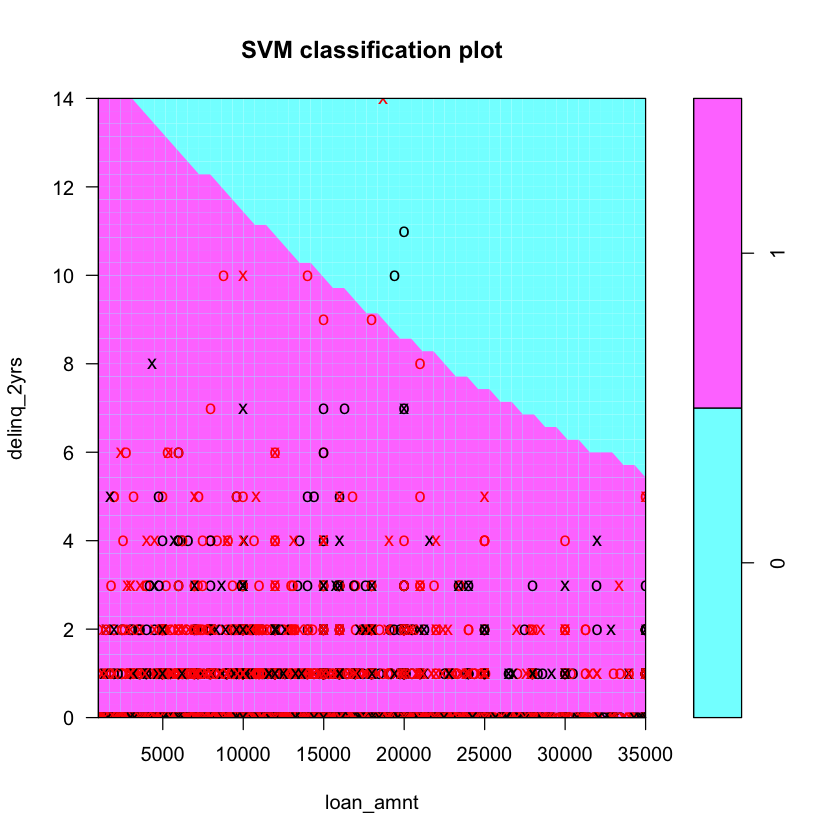

In [49]:
plot(svmfit3, temp, delinq_2yrs~loan_amnt) 

In [48]:
colnames(df4)

[1] "loan_amnt"                  "funded_amnt"               
 [3] "funded_amnt_inv"            "int_rate"                  
 [5] "installment"                "dti"                       
 [7] "delinq_2yrs"                "inq_last_6mths"            
 [9] "open_acc"                   "pub_rec"                   
[11] "revol_bal"                  "revol_util"                
[13] "total_acc"                  "total_rec_int"             
[15] "total_rec_late_fee"         "collections_12_mths_ex_med"
[17] "acc_now_delinq"             "tot_coll_amt"              
[19] "tot_cur_bal"                "total_rev_hi_lim"          
[21] "loan_rate"

In [34]:
train2 = sample(nrow(df3), round(0.8 * nrow(df3)))
length(train2)

[1] 168250

In [38]:
trainset2 <- df3[train2,]
dim(trainset2)

[1] 168250     21

In [41]:
testset2 <- df3[-train2, ]
dim(testset2)

[1] 42062    21

In [39]:
library(randomForest)
rf_model <- randomForest(loan_rate~.,data = trainset2, keep.forest=TRUE)

In [40]:
rf_model


Call:
 randomForest(formula = loan_rate ~ ., data = trainset2, keep.forest = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 24.03%
Confusion matrix:
     0      1 class.error
0 9856  35278  0.78162804
1 5157 117959  0.04188733

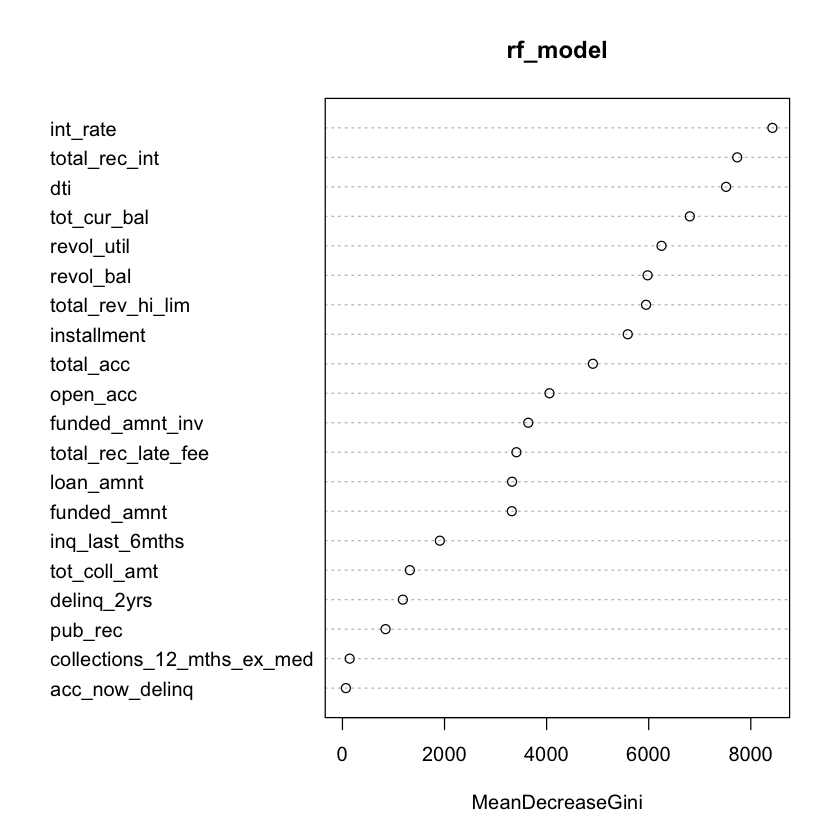

In [30]:
varImpPlot(rf_model)

In [31]:
importance(rf_model)

,MeanDecreaseGini
loan_amnt,3323.0490
funded_amnt,3317.6038
funded_amnt_inv,3640.2764
int_rate,8423.2912
installment,5588.9964
dti,7516.2359
delinq_2yrs,1183.2540
inq_last_6mths,1908.2250
open_acc,4056.0094
pub_rec,844.6215


Warning message in Ops.factor(yhat_rf, testset2$loan_rate):
“‘-’ not meaningful for factors”

[1] NA

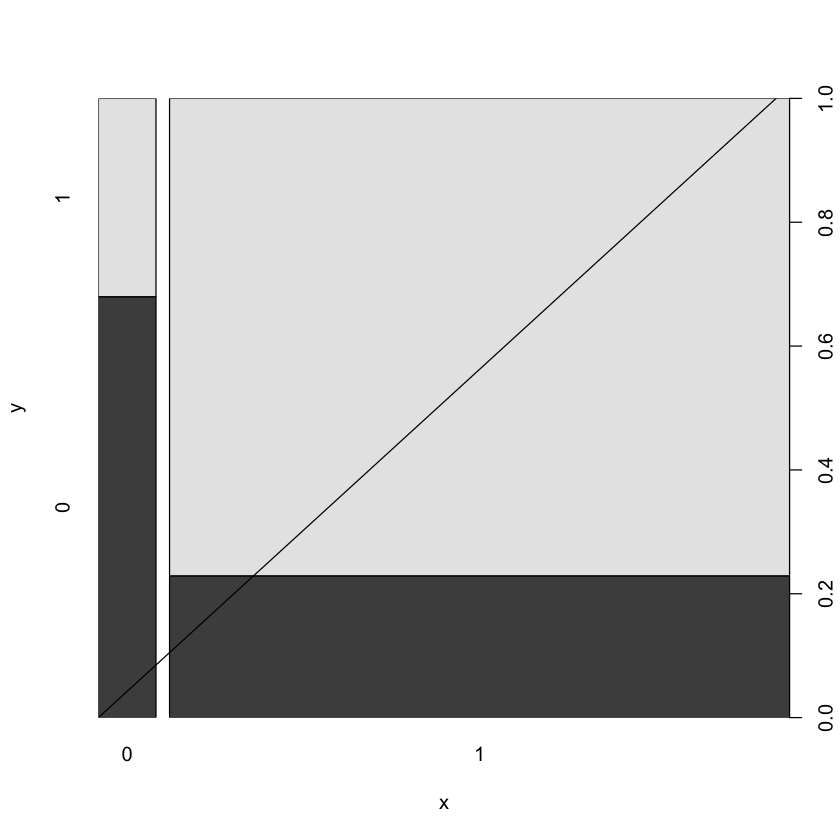

In [43]:
yhat_rf <- predict(rf_model, newdata = testset2)
plot(yhat_rf, testset2$loan_rate)
abline(0, 1)

In [44]:
table(testset2$loan_rate, yhat_rf)
1-(sum(testset2$loan_rate == yhat_rf)/nrow(testset2))

   yhat_rf
        0     1
  0  2430  8812
  1  1145 29675

[1] 0.236722